In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("loan_approved.csv")

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Feature data types:
1. Loan_ID : Categorical- nominal. Unique, Index (not representing quality of entity, not useful as they are not productive)
2. Gender : Categorical - Nominal (Depending on domain, we decide ordinal/nominal. Govt schemes may prefer female so cannot say for sure)
3. Married : Categorical - Nominal
4. Dependents(How many family members depend on the loan borrower) : Categorical - Ordinal
5. Education : Categorical - Nominal
6. Self_Employed : Categorical - Nominal
7. ApplicantIncome : Numerical - Continuous
8. CoApplicantIncome : Numerical - Continuous
9. LoanAmount : Numerical - Continuous
10. LoanAmountTerm : Numerical - Discrete
11. CreditHistory (encoded) : Discrete
12. PropertyArea : Categorical - Ordinal
13. LoanStatus : Categorical - Nominal

## How to identify types of data:
* categories of datatype for columns:
obejct, category, int, float, boolean, date-time
* use data.info()
* check one column at a time to check.



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
print(len(data['Loan_ID'].unique()))
print(len(data['Gender'].unique()))

3

In [ ]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
len(data['Dependents'].unique())

5

In [20]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [22]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [23]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [25]:
len(data['ApplicantIncome'].unique())

505

In [27]:
len(data['CoapplicantIncome'].unique())

287

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

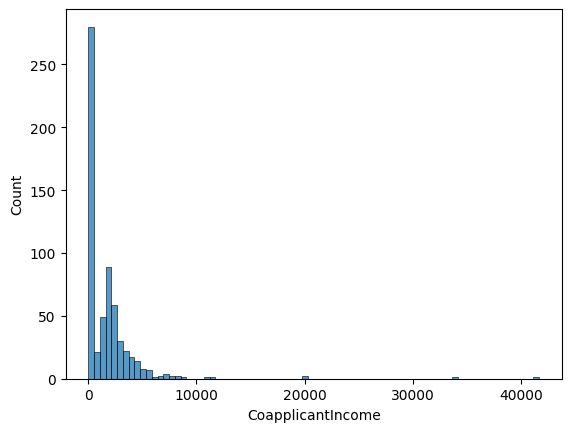

In [30]:
data['CoapplicantIncome'].isna().sum()
import seaborn as sns
sns.histplot(data['CoapplicantIncome'])

#### Feature engineering
CoApplicant unique values are only 287
Coapplicant who's income is zero is present. 
Such Coapplicants are of no use. Applicants have 505 unique values while coapplicants have only 287 uniques values.

In [31]:
len(data['LoanAmount'].unique())

204

In [32]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [33]:
len(data['Loan_Amount_Term'].unique())

11

### Filling Missing Values
In bank dataset we cannot fill using central tendency. 
Hence fill with a values that best suits the missing value.
Defaulter may put the missing values.
We must try to explore the data, analyze it and fill null values.
Apt value must be used not central tendency as it is a simple measure. 
Complex decisions taken by banks need statistics.

* How to fill missing values: 
1. Feature selection
2. Visulatization 
By using visulaization we can analyse each feature and based on the plots we can get insights. The insights help us understand how to data works.\
The value to be filled can be predicted using the insights.


In [35]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='Education', ylabel='count'>

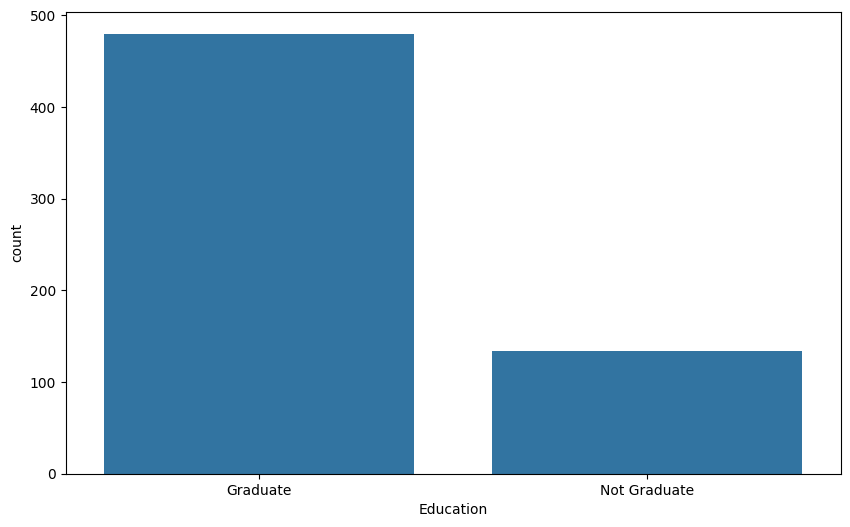

In [36]:
#Plots
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x='Education', data=data)

<Axes: xlabel='Self_Employed', ylabel='Count'>

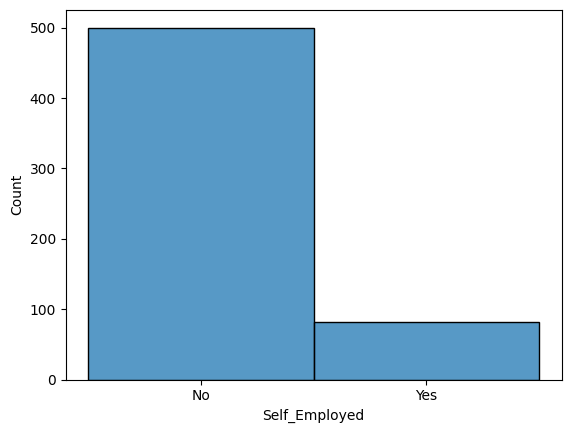

In [37]:
sns.histplot(x='Self_Employed', data=data)

In [38]:
data.loc[data['Dependents'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [39]:
data.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

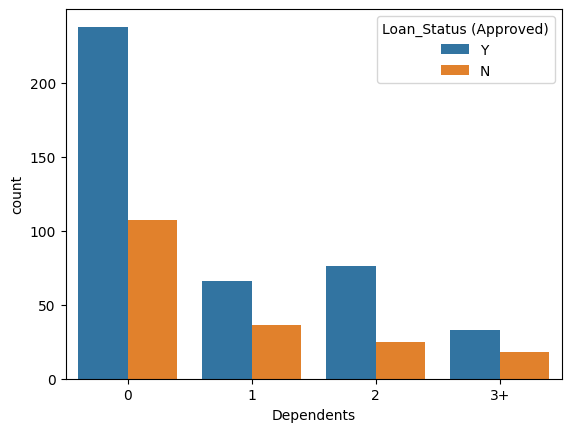

In [42]:
sns.countplot(x='Dependents', data=data, hue = 'Loan_Status (Approved)')